In [ ]:
import matplotlib.pyplot as plt
from lib import train_linear_q, evaluate_policy, CartpoleQNetwork, DQN_Trainer
import gymnasium as gym

print("===== DQN Training =====")
env = gym.make("CartPole-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
print(state_dim, action_dim)


===== DQN Training =====
4 2


/Users/gwanwoo/Developer/reinforcement_study/venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


[DQN] Episode 0, Reward: 15.0, Epsilon: 1.000, loss: 0.000
[DQN] Episode 50, Reward: 97.0, Epsilon: 0.781, loss: 0.370
[DQN] Episode 100, Reward: 34.0, Epsilon: 0.610, loss: 0.093
[DQN] Episode 150, Reward: 47.0, Epsilon: 0.478, loss: 0.205
[DQN] Episode 200, Reward: 25.0, Epsilon: 0.374, loss: 0.457
[DQN] Episode 250, Reward: 196.0, Epsilon: 0.294, loss: 0.320
[DQN] Episode 300, Reward: 201.0, Epsilon: 0.231, loss: 0.134
[DQN] Episode 350, Reward: 113.0, Epsilon: 0.182, loss: 0.163
[DQN] Episode 400, Reward: 500.0, Epsilon: 0.144, loss: 0.154
[DQN] Episode 450, Reward: 36.0, Epsilon: 0.114, loss: 0.140
[DQN] Episode 500, Reward: 500.0, Epsilon: 0.091, loss: 0.509
[DQN] Episode 550, Reward: 500.0, Epsilon: 0.073, loss: 0.126
[DQN] Episode 600, Reward: 232.0, Epsilon: 0.059, loss: 0.031
[DQN] Episode 650, Reward: 212.0, Epsilon: 0.048, loss: 1.154
[DQN] Episode 700, Reward: 265.0, Epsilon: 0.040, loss: 0.838
[DQN] Episode 750, Reward: 492.0, Epsilon: 0.033, loss: 0.193
[DQN] Episode 800

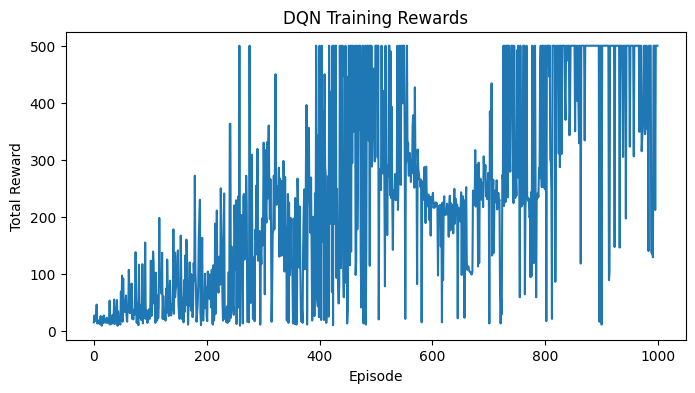

In [ ]:
policy_net = CartpoleQNetwork(state_dim, action_dim, hidden_dim=128)
target_net = CartpoleQNetwork(state_dim, action_dim, hidden_dim=128)
dqn_trainer = DQN_Trainer(env=env, policy_net=policy_net, target_net=target_net, device='mps')
dqn_rewards = dqn_trainer.dqn(
    num_episodes=1000,
    batch_size=64,
    learning_rate=1e-3,
    step_lr_decay=0.5,
    step_lr_episode=200,
    epsilon_decay=200,
    print_freq=50,
    model_save_freq=50,
)


# 학습 보상 시각화
plt.figure(figsize=(8,4))
plt.plot(dqn_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Rewards")
plt.show()


In [ ]:
import torch
import os
# 학습된 DQN 모델 평가 및 렌더링 (실제 창이 뜨며 CartPole이 움직이는 것을 볼 수 있습니다)
print("===== DQN Evaluation =====")
policy_net = CartpoleQNetwork(state_dim, action_dim, hidden_dim=128)
path = "20250212-2242/850.pth"
dir, num_episode = os.path.split(path)
num_episode=num_episode.split(".")[0]

policy_net.load_state_dict(torch.load("20250212-2242/850.pth"))
eval_rewards_dqn = evaluate_policy(policy_net, n_episodes=3, max_step=500, save_dir=f"{dir}", model_path=f"{num_episode}")
print("DQN Evaluation Rewards:", eval_rewards_dqn)


===== DQN Evaluation =====
Evaluation Episode 0 Reward: 500.0
video is saved in 20250212-2242/eval_0.mp4
Evaluation Episode 1 Reward: 500.0
video is saved in 20250212-2242/eval_1.mp4
Evaluation Episode 2 Reward: 500.0
video is saved in 20250212-2242/eval_2.mp4
DQN Evaluation Rewards: [500.0, 500.0, 500.0]


In [ ]:


# ---------------------------
# 선형 Q-learning을 이용한 학습 및 평가
# ---------------------------
print("===== Linear Q-learning Training =====")
linear_model, linear_rewards = train_linear_q(num_episodes=300, render=False)

# 학습 보상 시각화
plt.figure(figsize=(8,4))
plt.plot(linear_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Linear Q-learning Training Rewards")
plt.show()

# 학습된 선형 모델 평가 및 렌더링
print("===== Linear Q-learning Evaluation =====")
eval_rewards_linear = evaluate_policy(env, linear_model, n_episodes=3, render=True)
print("Linear Q-learning Evaluation Rewards:", eval_rewards_linear)